## Finding maximum values

This workbook calculates the black-body spectra of 'hot' objects, in this case a hot cup of tea and a person. 

To do this the code includes examples of how to find the maximum value of a `numpy` array, using `np.amax()`, and the array index that this corresponds to, using `np.argmax()`.

In the case of black-body radiation, we can use these two functions to find the wavelength at which the spectral intensity is a maximum, and the maximum intensity.

The Planck equation describes a blackbody radiation curve. It is a historically important equation in quantum theory, because it was the first use of quantisation of energy. 

\begin{equation}
I_{\lambda, T} = \frac{2hc^2}{\lambda ^5 e^{\frac{hc}{\lambda k_B T}}-1}
\end{equation}

This notebook uses a [function](http://blogs.bath.ac.uk/python/functions/) to calculate the intensity of the radiation at each wavelength.

Other techniques used in this notebook are:
- [scipy.constants](http://blogs.bath.ac.uk/python/working-with-physical-constants-and-units/) is used to import the physical constants $c$, $h$, and $k_\mathrm{B}$.
- `matplotlib.pyplot` is used to plot the calculated spectra.
- `numpy` is used for handling the arrays used in the calculations.
- `np.argmax` and `np.amax` are used to find the wavelength of the maximum value and the maximum intensity, respectively.

Some other useful things to note...
- You can enter greek letters into print statements by typing the LaTeX command and pressing tab at the end of the word, so `\mu`+'tab' changes in your notebook to read $\mu$.
- You can change the colour of the lines on your plot. In my plot statements you can see the use of 'c-' and 'm-', which colours the lines cyan and magenta respectively.
- Other colours include 'k-' for black, 'r-' for red, 'g-' for green, and 'b-' for blue. A [whole range of named colours](https://matplotlib.org/examples/color/named_colors.html) can be used in `matplotlib`, but these are most of the single letter colours.
- In the final cell we use a more advanced Jupyter notebook technique, to create a Markdown object using code, and then `display` it. This allows us to combine the results from our calculation with the nice formatting available with LaTeX and Markdown. The details of how this works, and an introduction to formatted print, and using LaTeX in Markdown will all be topics covered in future notebooks.

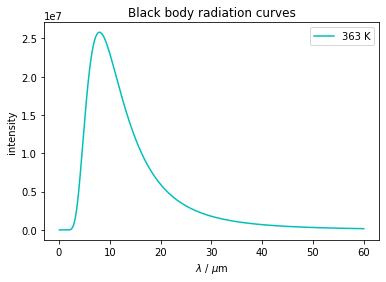

λ max = 7.982999999999968 μm
I max =  25814194.477863766 J m^2


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import h #Planck's constant
from scipy.constants import c #speed of light
from scipy.constants import k #Boltzmann constant
from IPython.display import Markdown as md
#
def planck(lambdanm, T):
    intensity = 2.0*h*c**2/ ( (lambdanm**5) * (np.exp(h*c/(lambdanm*k*T)) - 1.0) )
    return intensity
#
## wavelengths in increments from 100nm to 60 um in 1 nm increments
wavelengths = np.arange(100e-9, 60e-6, 1e-9) 
#
## intensity at 363K, 310K
intensity363 = planck(wavelengths, 363.) #hotcupoftea
#intensity310 = planck(wavelengths, 310.) #person

#note the use of the multiplier on the wavelengths such that it willnow have units of μm
plt.plot(wavelengths*1e6, intensity363, 'c-', label='363 K') #hotcupoftea - cyan
#plt.plot(wavelengths*1e6, intensity310, 'm-', label='310') #person - magenta

plt.title('Black body radiation curves')
plt.legend() # Shows the legend
plt.xlabel('$\lambda$ / $\mu$m')
plt.ylabel('intensity')
## show the plot
plt.show()

print ("λ max =", wavelengths[np.argmax(intensity363)]*1e6, "μm")#maximum wavelength of emission, np.argmax(intensity373,axis=0)] is pulling the maximum value from the intensity array and then matching it to the corresponding wavelength in put to the calculation
#you can get the mu symbol by typing in the latex for it then pressing tab! so \mu tab!
print ("I max = ", np.amax(intensity363), "J m^2")

In [10]:
from IPython.display import Markdown as md
lambda_max = wavelengths[ np.argmax( intensity363 ) ] 
display( md(r"$\lambda_\mathrm{{max}}=$ {:.3f} $\mu$m".format( lambda_max * 1e6 ) ) )
display( md(r"$I_\mathrm{{max}} =$ {:.3E} $J m^{{-2}}$.".format( np.max( intensity363 ) ) ) )

$\lambda_\mathrm{max}=$ 7.983 $\mu$m

$I_\mathrm{max} =$ 2.581E+07 $J m^{-2}$.